## Churn prediction project


Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## 1. Data preparation

- Download the data, read it 
- Look at the data
- Make column names and values look uniform 
- Check if all the columns read correctly 
- Check if the churn variables need any preparation 

####  Download the data, read it 

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
df = pd.read_csv('/home/timur/work_hub/ml_zoomcamp2023/3. Machine Learning for Classification/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
df.shape

(7043, 21)

In [5]:
df.head().T

0             1               2  \
customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK   
gender                      Female          Male            Male   
SeniorCitizen                    0             0               0   
Partner                        Yes            No              No   
Dependents                      No            No              No   
tenure                           1            34               2   
PhoneService                    No           Yes             Yes   
MultipleLines     No phone service            No              No   
InternetService                DSL           DSL             DSL   
OnlineSecurity                  No           Yes             Yes   
OnlineBackup                   Yes            No             Yes   
DeviceProtection                No           Yes              No   
TechSupport                     No            No              No   
StreamingTV                     No            No              No   
StreamingMovies                 No            No              No   
Contract            Month-to-month      One year  Month-to-month   
PaperlessBilling               Yes            No             Yes   
PaymentMethod     Electronic check  Mailed check    Mailed check   
MonthlyCharges               29.85         56.95           53.85   
TotalCharges                 29.85        1889.5          108.15   
Churn                           No            No             Yes   

                                          3                 4  
customerID                       7795-CFOCW        9237-HQITU  
gender                                 Male            Female  
SeniorCitizen                             0                 0  
Partner                                  No                No  
Dependents                               No                No  
tenure                                   45                 2  
PhoneService                             No               Yes  
MultipleLines              No phone service                No  
InternetService                         DSL       Fiber optic  
OnlineSecurity                          Yes                No  
OnlineBackup                             No                No  
DeviceProtection                        Yes                No  
TechSupport                             Yes                No  
StreamingTV                              No                No  
StreamingMovies                          No                No  
Contract                           One year    Month-to-month  
PaperlessBilling                         No               Yes  
PaymentMethod     Bank transfer (automatic)  Electronic check  
MonthlyCharges                         42.3              70.7  
TotalCharges                        1840.75            151.65  
Churn                                    No               Yes

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

####  Make column names and values look uniform

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [8]:
cat_variables = list(df.dtypes[df.dtypes == 'object'].index)
cat_variables

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [9]:
for i in cat_variables:
    df[i] = df[i].str.lower().str.replace(' ', '_')

In [10]:
df.head().T

0             1               2  \
customerid              7590-vhveg    5575-gnvde      3668-qpybk   
gender                      female          male            male   
seniorcitizen                    0             0               0   
partner                        yes            no              no   
dependents                      no            no              no   
tenure                           1            34               2   
phoneservice                    no           yes             yes   
multiplelines     no_phone_service            no              no   
internetservice                dsl           dsl             dsl   
onlinesecurity                  no           yes             yes   
onlinebackup                   yes            no             yes   
deviceprotection                no           yes              no   
techsupport                     no            no              no   
streamingtv                     no            no              no   
streamingmovies                 no            no              no   
contract            month-to-month      one_year  month-to-month   
paperlessbilling               yes            no             yes   
paymentmethod     electronic_check  mailed_check    mailed_check   
monthlycharges               29.85         56.95           53.85   
totalcharges                 29.85        1889.5          108.15   
churn                           no            no             yes   

                                          3                 4  
customerid                       7795-cfocw        9237-hqitu  
gender                                 male            female  
seniorcitizen                             0                 0  
partner                                  no                no  
dependents                               no                no  
tenure                                   45                 2  
phoneservice                             no               yes  
multiplelines              no_phone_service                no  
internetservice                         dsl       fiber_optic  
onlinesecurity                          yes                no  
onlinebackup                             no                no  
deviceprotection                        yes                no  
techsupport                             yes                no  
streamingtv                              no                no  
streamingmovies                          no                no  
contract                           one_year    month-to-month  
paperlessbilling                         no               yes  
paymentmethod     bank_transfer_(automatic)  electronic_check  
monthlycharges                         42.3              70.7  
totalcharges                        1840.75            151.65  
churn                                    no               yes

In [11]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

####  totalcharges column looks is object dtype but it should be a nubmer dtype (because it looks like a nubmer, see below)

In [12]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

####  Convert this column to numeric. We set 'errors' parameter in case we get errors. If we get an error while convertion, errors record replace with null. Actually we get an errors because we have some underscore in our dataset. Becasue of that we get 11 Nan (see code bellow).

In [13]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')
tc

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [14]:
tc.isna().sum()

11

In [15]:
df[tc.isna()][['customerid', 'totalcharges']]

customerid totalcharges
488   4472-lvygi            _
753   3115-czmzd            _
936   5709-lvoeq            _
1082  4367-nuyao            _
1340  1371-dwpaz            _
3331  7644-omvmy            _
3826  3213-vvolg            _
4380  2520-sgtta            _
5218  2923-arzlg            _
6670  4075-wkniu            _
6754  2775-sefee            _

In [16]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [17]:
df.isna().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

####  Replace missing values

In [18]:
df.totalcharges = df.totalcharges.fillna(0)
df.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

#### Look at a churn variable

In [19]:
df.churn = (df.churn == 'yes').astype('int')
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [20]:
df.churn.value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

## 2. Set up the validation framwork

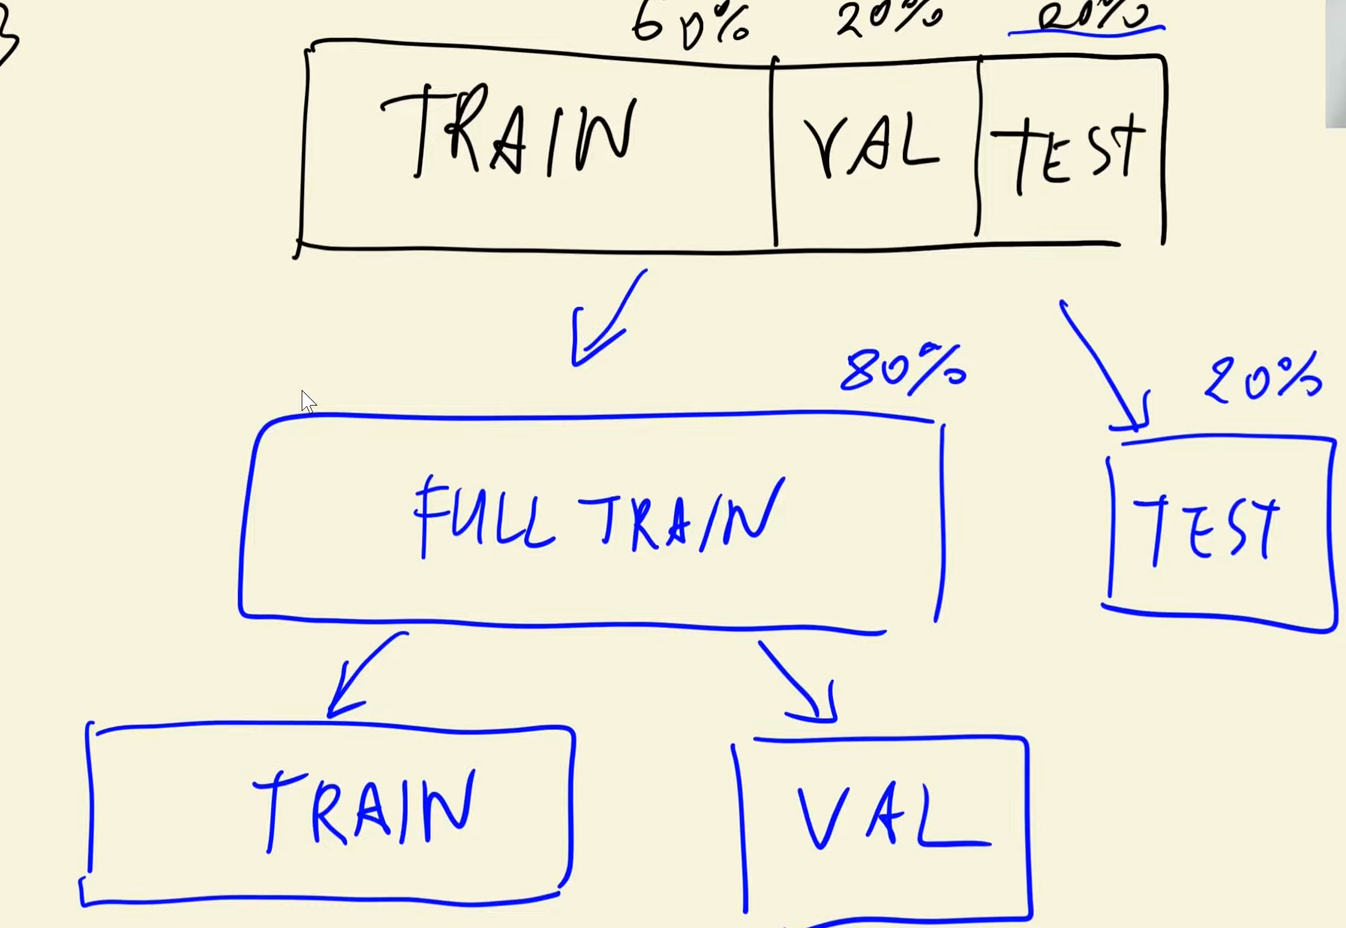

#### Import train_test split function from sklearn

In [21]:
from sklearn.model_selection import train_test_split

#### Split data into df_full_train(80%) and df_test(20%)

In [22]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [23]:
len(df_full_train), len(df_test)

(5634, 1409)

#### Split df_full_train into df_train(60%) and df_val(20%)

In [24]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [25]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

#### Reset indexes

In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [27]:
df_test.head()

customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  8879-zkjof  female              0      no         no      41          yes   
1  0201-mibol  female              1      no         no      66          yes   
2  1600-dilpe  female              0      no         no      12          yes   
3  8601-qacrs  female              0      no         no       5          yes   
4  7919-zodzz  female              0     yes        yes      10          yes   

  multiplelines internetservice onlinesecurity  ... deviceprotection  \
0            no             dsl            yes  ...              yes   
1           yes     fiber_optic            yes  ...               no   
2            no             dsl             no  ...               no   
3           yes             dsl             no  ...               no   
4            no             dsl             no  ...              yes   

  techsupport streamingtv streamingmovies        contract paperlessbilling  \
0         yes         yes             yes        one_year              yes   
1          no         yes             yes        two_year              yes   
2          no          no              no  month-to-month              yes   
3          no          no              no  month-to-month              yes   
4          no          no             yes        one_year              yes   

               paymentmethod monthlycharges  totalcharges  churn  
0  bank_transfer_(automatic)          79.85       3320.75      0  
1  bank_transfer_(automatic)         102.40       6471.85      0  
2  bank_transfer_(automatic)          45.00        524.35      0  
3               mailed_check          50.60        249.95      1  
4               mailed_check          65.90        660.05      0  

[5 rows x 21 columns]

#### Get our y target

In [28]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [29]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

#### Delete churn column

In [30]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3. EDA

In [31]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

customerid  gender  seniorcitizen partner dependents  tenure  \
0     5442-pptjy    male              0     yes        yes      12   
1     6261-rcvns  female              0      no         no      42   
2     2176-osjuv    male              0     yes         no      71   
3     6161-erdgd    male              0     yes        yes      71   
4     2364-ufrom    male              0      no         no      30   
...          ...     ...            ...     ...        ...     ...   
5629  0781-lkxbr    male              1      no         no       9   
5630  3507-gasnp    male              0      no        yes      60   
5631  8868-wozgu    male              0      no         no      28   
5632  1251-krreg    male              0      no         no       2   
5633  5840-nvdcg  female              0     yes        yes      16   

     phoneservice multiplelines internetservice       onlinesecurity  ...  \
0             yes            no              no  no_internet_service  ...   
1             yes            no             dsl                  yes  ...   
2             yes           yes             dsl                  yes  ...   
3             yes           yes             dsl                  yes  ...   
4             yes            no             dsl                  yes  ...   
...           ...           ...             ...                  ...  ...   
5629          yes           yes     fiber_optic                   no  ...   
5630          yes            no              no  no_internet_service  ...   
5631          yes           yes     fiber_optic                   no  ...   
5632          yes           yes             dsl                   no  ...   
5633          yes            no             dsl                  yes  ...   

         deviceprotection          techsupport          streamingtv  \
0     no_internet_service  no_internet_service  no_internet_service   
1                     yes                  yes                   no   
2                      no                  yes                   no   
3                     yes                  yes                  yes   
4                      no                  yes                  yes   
...                   ...                  ...                  ...   
5629                  yes                   no                  yes   
5630  no_internet_service  no_internet_service  no_internet_service   
5631                  yes                   no                  yes   
5632                   no                   no                   no   
5633                   no                  yes                   no   

          streamingmovies        contract paperlessbilling  \
0     no_internet_service        two_year               no   
1                     yes        one_year               no   
2                      no        two_year               no   
3                     yes        one_year               no   
4                      no        one_year               no   
...                   ...             ...              ...   
5629                  yes  month-to-month              yes   
5630  no_internet_service        two_year               no   
5631                  yes  month-to-month              yes   
5632                   no  month-to-month              yes   
5633                  yes        two_year               no   

                  paymentmethod monthlycharges  totalcharges  churn  
0                  mailed_check          19.70        258.35      0  
1       credit_card_(automatic)          73.90       3160.55      1  
2     bank_transfer_(automatic)          65.15       4681.75      0  
3              electronic_check          85.45       6300.85      0  
4              electronic_check          70.40       2044.75      0  
...                         ...            ...           ...    ...  
5629           electronic_check         100.50        918.60      1  
5630               mailed_check          19.95       1189.90      0  
5631        

In [32]:
df_full_train.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [33]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

#### Churn rate

In [34]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [35]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [36]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [37]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [38]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
               'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
               'paymentmethod']

In [39]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 5.Feature importance

Identify which features affect our target variable

#### Churn rate

Look at a churn rate among different groups.

In [40]:
df_full_train.head()

customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  5442-pptjy    male              0     yes        yes      12          yes   
1  6261-rcvns  female              0      no         no      42          yes   
2  2176-osjuv    male              0     yes         no      71          yes   
3  6161-erdgd    male              0     yes        yes      71          yes   
4  2364-ufrom    male              0      no         no      30          yes   

  multiplelines internetservice       onlinesecurity  ...  \
0            no              no  no_internet_service  ...   
1            no             dsl                  yes  ...   
2           yes             dsl                  yes  ...   
3           yes             dsl                  yes  ...   
4            no             dsl                  yes  ...   

      deviceprotection          techsupport          streamingtv  \
0  no_internet_service  no_internet_service  no_internet_service   
1                  yes                  yes                   no   
2                   no                  yes                   no   
3                  yes                  yes                  yes   
4                   no                  yes                  yes   

       streamingmovies  contract paperlessbilling              paymentmethod  \
0  no_internet_service  two_year               no               mailed_check   
1                  yes  one_year               no    credit_card_(automatic)   
2                   no  two_year               no  bank_transfer_(automatic)   
3                  yes  one_year               no           electronic_check   
4                   no  one_year               no           electronic_check   

  monthlycharges  totalcharges  churn  
0          19.70        258.35      0  
1          73.90       3160.55      1  
2          65.15       4681.75      0  
3          85.45       6300.85      0  
4          70.40       2044.75      0  

[5 rows x 21 columns]

#### Churn rate among male and female 

In [41]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [42]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [43]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

#### Churn rate among groups with and without partner

In [44]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [45]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

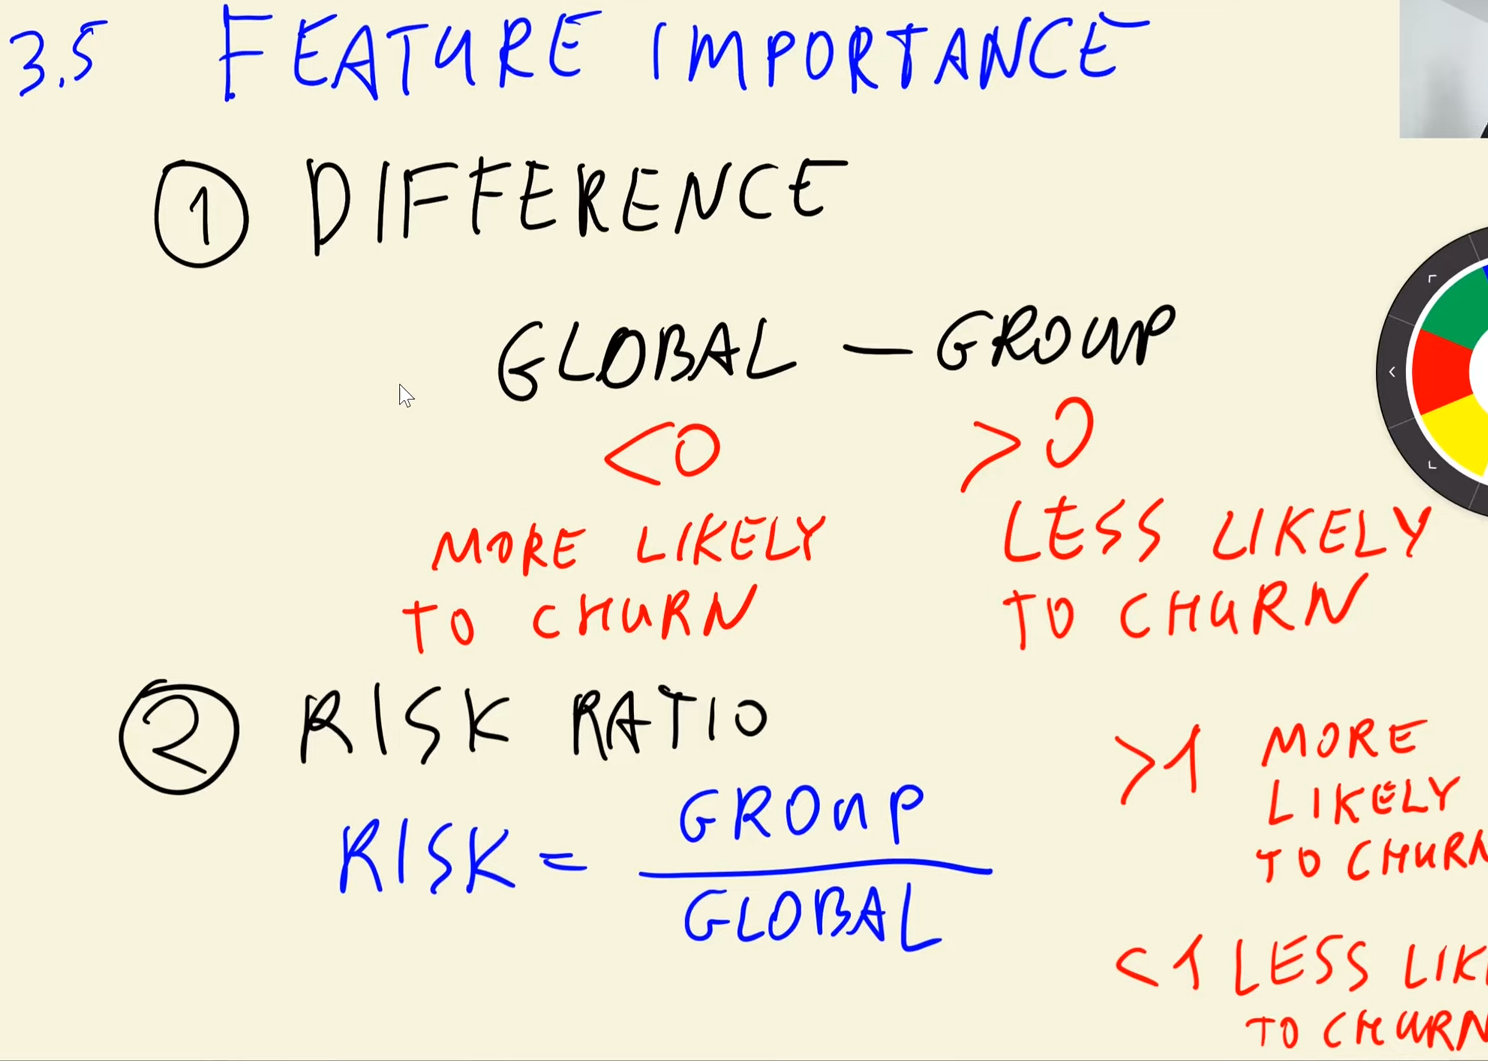

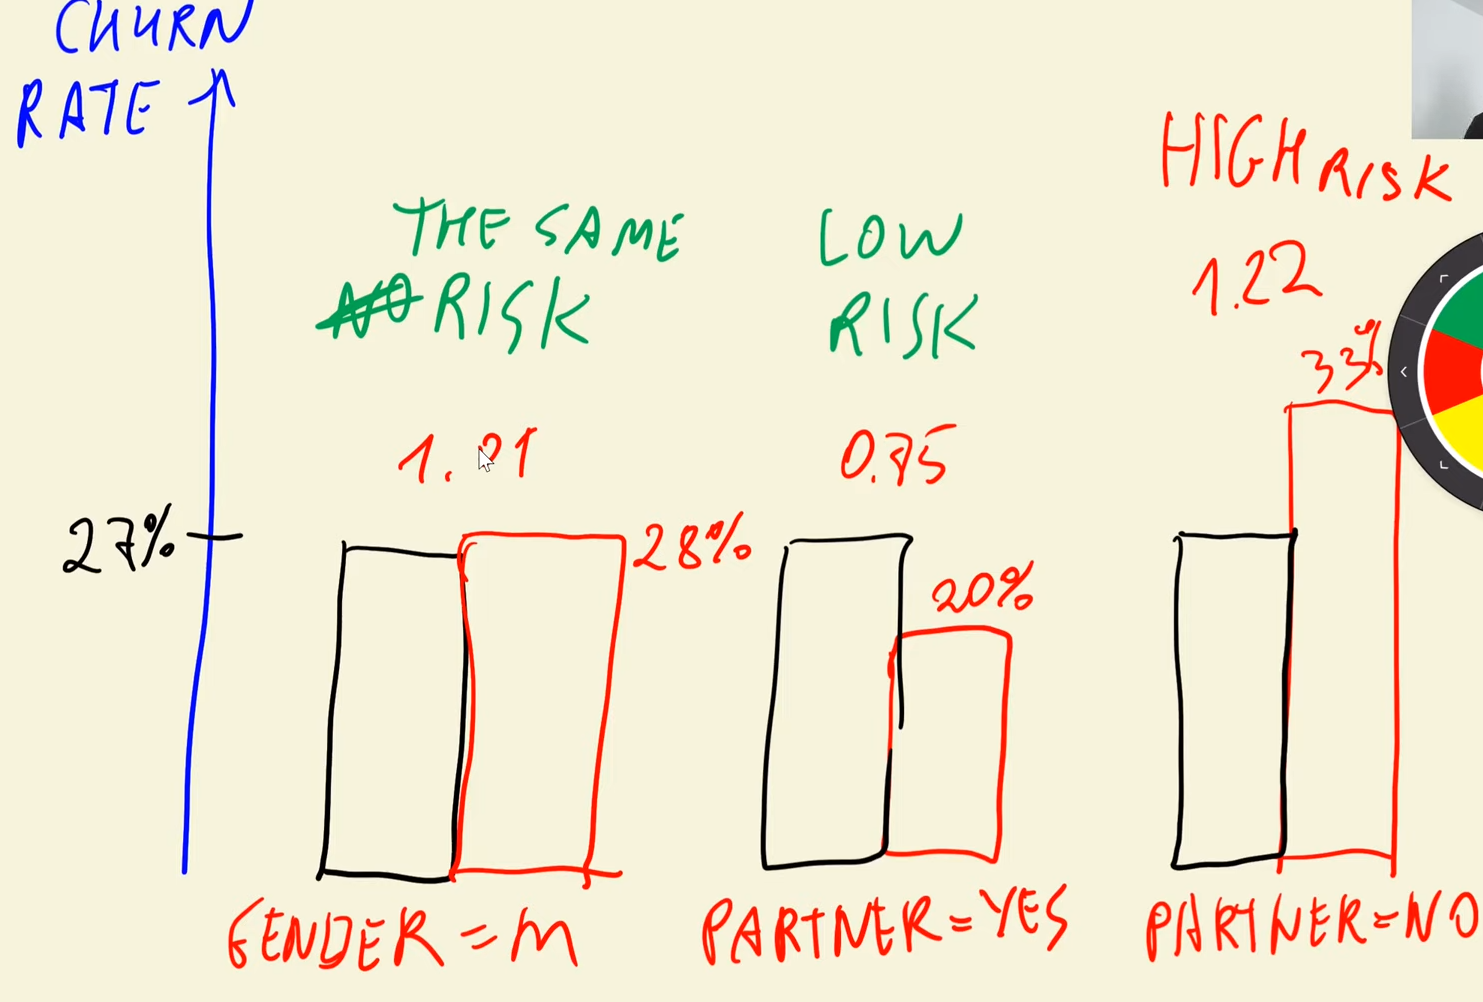

 ####  We have to implement this request in pandas

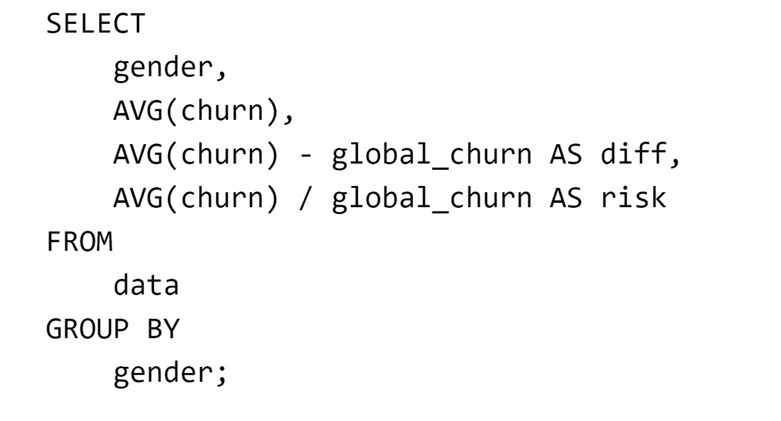

In [46]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn 
df_group['risk'] = df_group['mean'] / global_churn
df_group

mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006856  1.025396
male    0.263214   2838 -0.006755  0.974980

Implement this to all categorical variables

In [47]:
from IPython.display import display

In [48]:
for i in categorical:
    print(i)
    df_group = df_full_train.groupby(i).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn 
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006856  1.025396
male    0.263214   2838 -0.006755  0.974980



seniorcitizen


mean  count      diff      risk
seniorcitizen                                     
0              0.242270   4722 -0.027698  0.897403
1              0.413377    912  0.143409  1.531208



partner


mean  count      diff      risk
partner                                     
no       0.329809   2932  0.059841  1.221659
yes      0.205033   2702 -0.064935  0.759472



dependents


mean  count      diff      risk
dependents                                     
no          0.313760   3968  0.043792  1.162212
yes         0.165666   1666 -0.104302  0.613651



phoneservice


mean  count      diff      risk
phoneservice                                     
no            0.241316    547 -0.028652  0.893870
yes           0.273049   5087  0.003081  1.011412



multiplelines


mean  count      diff      risk
multiplelines                                        
no                0.257407   2700 -0.012561  0.953474
no_phone_service  0.241316    547 -0.028652  0.893870
yes               0.290742   2387  0.020773  1.076948



internetservice


mean  count      diff      risk
internetservice                                     
dsl              0.192347   1934 -0.077621  0.712482
fiber_optic      0.425171   2479  0.155203  1.574895
no               0.077805   1221 -0.192163  0.288201



onlinesecurity


mean  count      diff      risk
onlinesecurity                                          
no                   0.420921   2801  0.150953  1.559152
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.153226   1612 -0.116742  0.567570



onlinebackup


mean  count      diff      risk
onlinebackup                                            
no                   0.404323   2498  0.134355  1.497672
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.217232   1915 -0.052736  0.804660



deviceprotection


mean  count      diff      risk
deviceprotection                                        
no                   0.395875   2473  0.125907  1.466379
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.230412   1940 -0.039556  0.853480



techsupport


mean  count      diff      risk
techsupport                                             
no                   0.418914   2781  0.148946  1.551717
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.159926   1632 -0.110042  0.592390



streamingtv


mean  count      diff      risk
streamingtv                                             
no                   0.342832   2246  0.072864  1.269897
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.302723   2167  0.032755  1.121328



streamingmovies


mean  count      diff      risk
streamingmovies                                         
no                   0.338906   2213  0.068938  1.255358
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.307273   2200  0.037305  1.138182



contract


mean  count      diff      risk
contract                                           
month-to-month  0.431701   3104  0.161733  1.599082
one_year        0.120573   1186 -0.149395  0.446621
two_year        0.028274   1344 -0.241694  0.104730



paperlessbilling


mean  count      diff      risk
paperlessbilling                                     
no                0.172071   2313 -0.097897  0.637375
yes               0.338151   3321  0.068183  1.252560



paymentmethod


mean  count      diff      risk
paymentmethod                                                 
bank_transfer_(automatic)  0.168171   1219 -0.101797  0.622928
credit_card_(automatic)    0.164339   1217 -0.105630  0.608733
electronic_check           0.455890   1893  0.185922  1.688682
mailed_check               0.193870   1305 -0.076098  0.718121

## 6.Feature importance: Mutual information

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another. 

**We use mutual information as a way to measure importance categorical features**

In [49]:
from sklearn.metrics import mutual_info_score

In [50]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [51]:
mutual_info_score(df_full_train.partner, df_full_train.contract)

0.04623822773507483

In [52]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [53]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 7.Feature importance: Correlation

How about numarical columns?

**We use correlation as a way to measure importance numerical features**

- Correlation coefficient

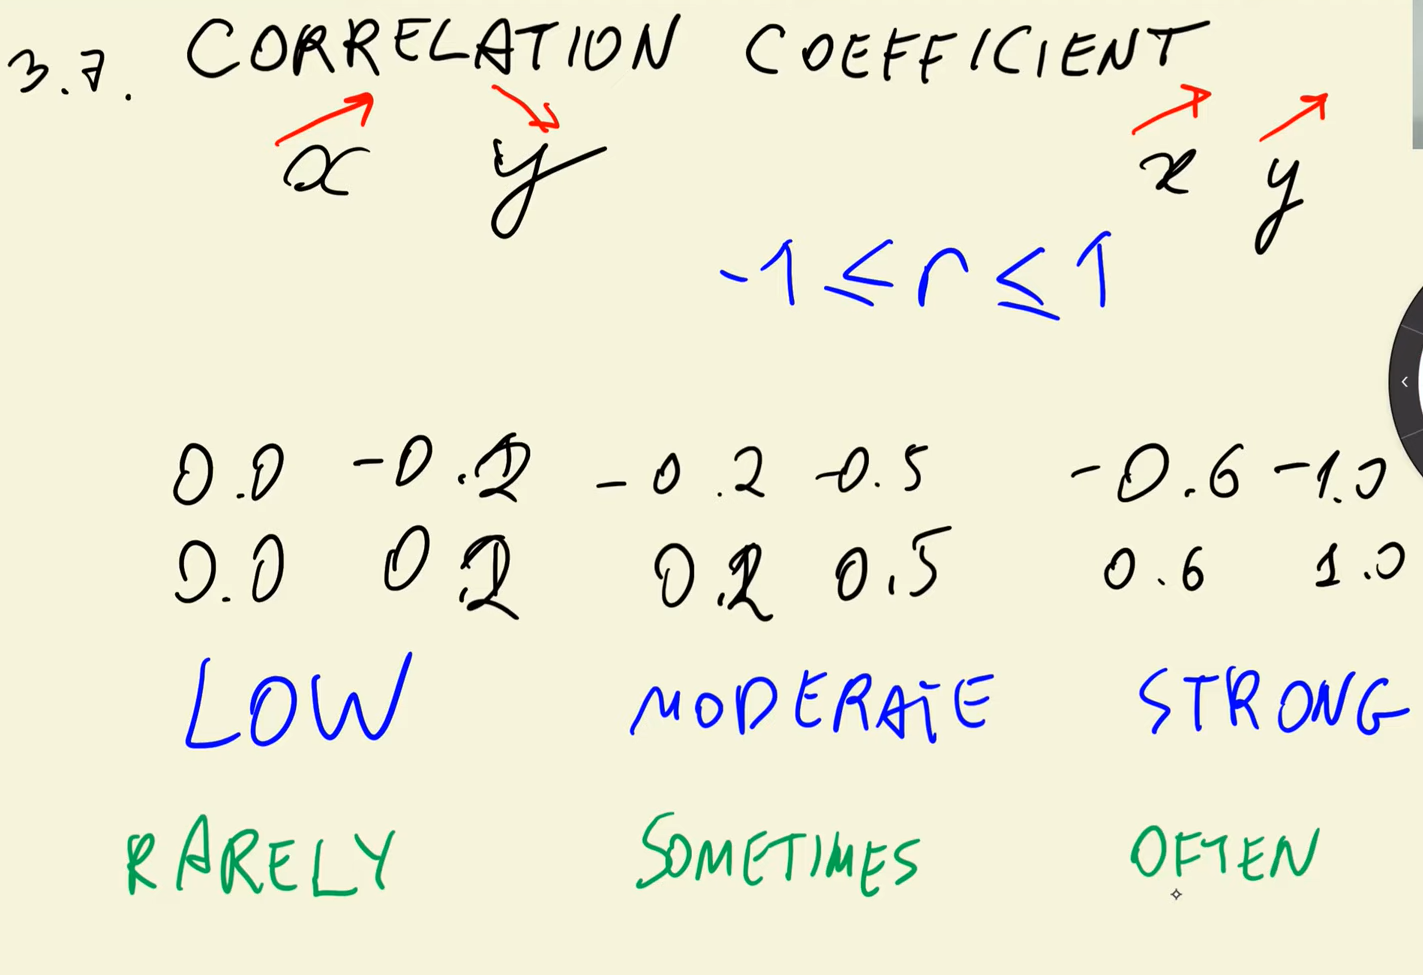

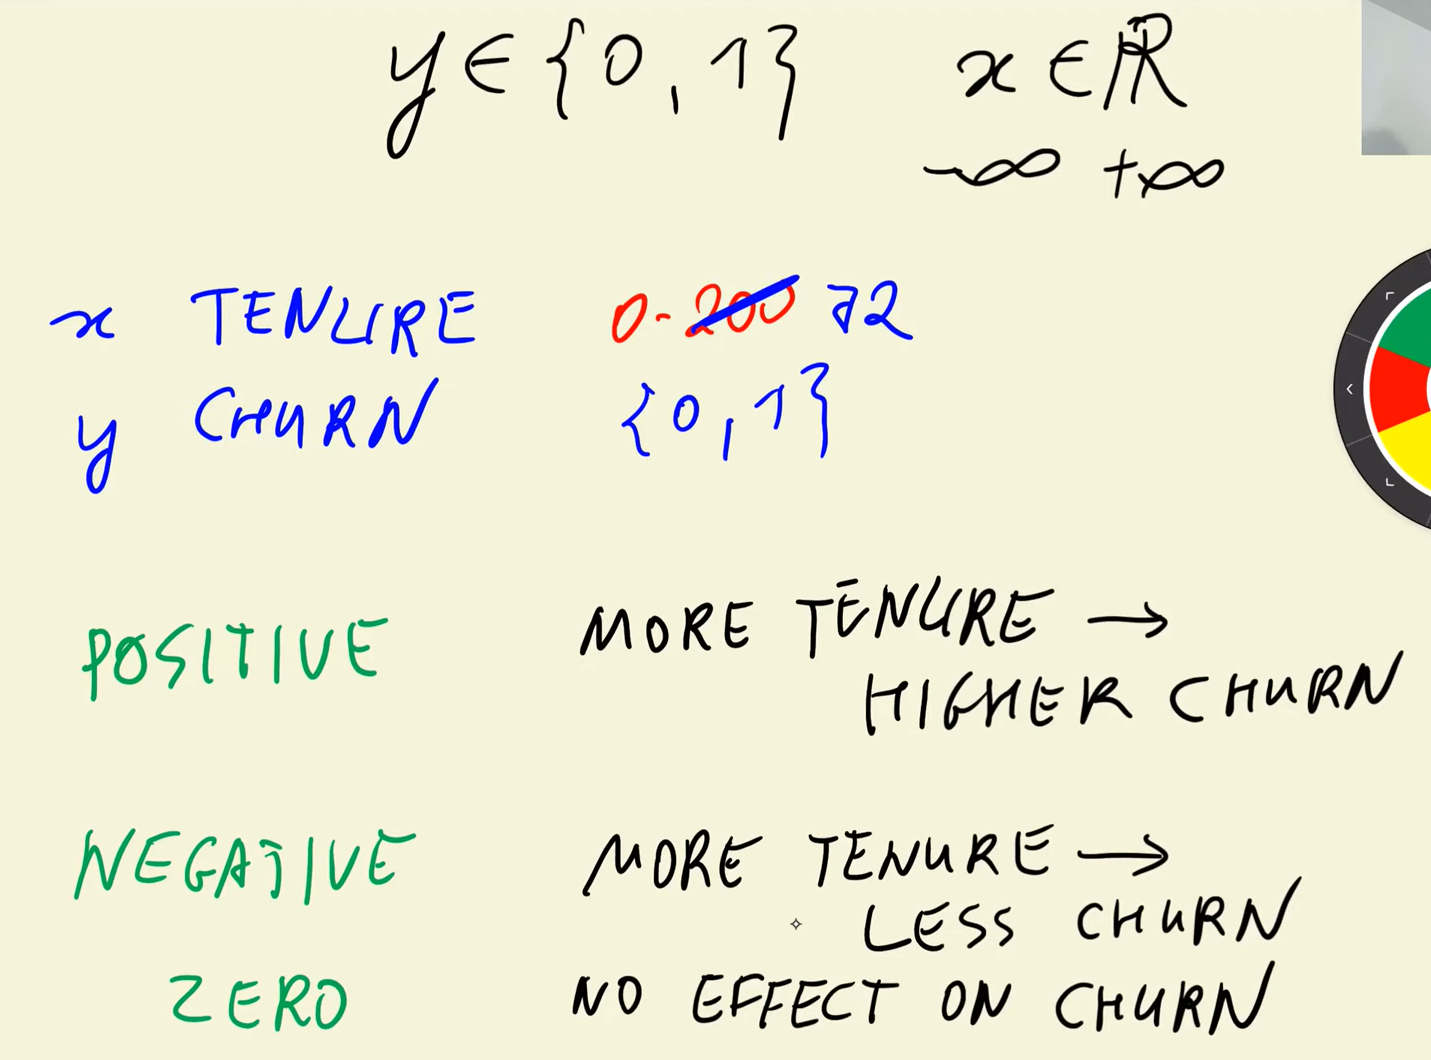

In [54]:
df_full_train[numerical]

tenure  monthlycharges  totalcharges
0         12           19.70        258.35
1         42           73.90       3160.55
2         71           65.15       4681.75
3         71           85.45       6300.85
4         30           70.40       2044.75
...      ...             ...           ...
5629       9          100.50        918.60
5630      60           19.95       1189.90
5631      28          105.70       2979.50
5632       2           54.40        114.10
5633      16           68.25       1114.85

[5634 rows x 3 columns]

In [55]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

For examply let's check churn probability on tenure <=2

In [56]:
df_full_train[df_full_train.tenure <=2].churn.mean()

0.5953420669577875

on 2< tenure <=12

In [57]:
df_full_train[(df_full_train.tenure >2) & (df_full_train.tenure <=12)].churn.mean()

0.3994413407821229

on tenure > 12

In [58]:
df_full_train[df_full_train.tenure >12].churn.mean()

0.17634908339788277

Vizualization

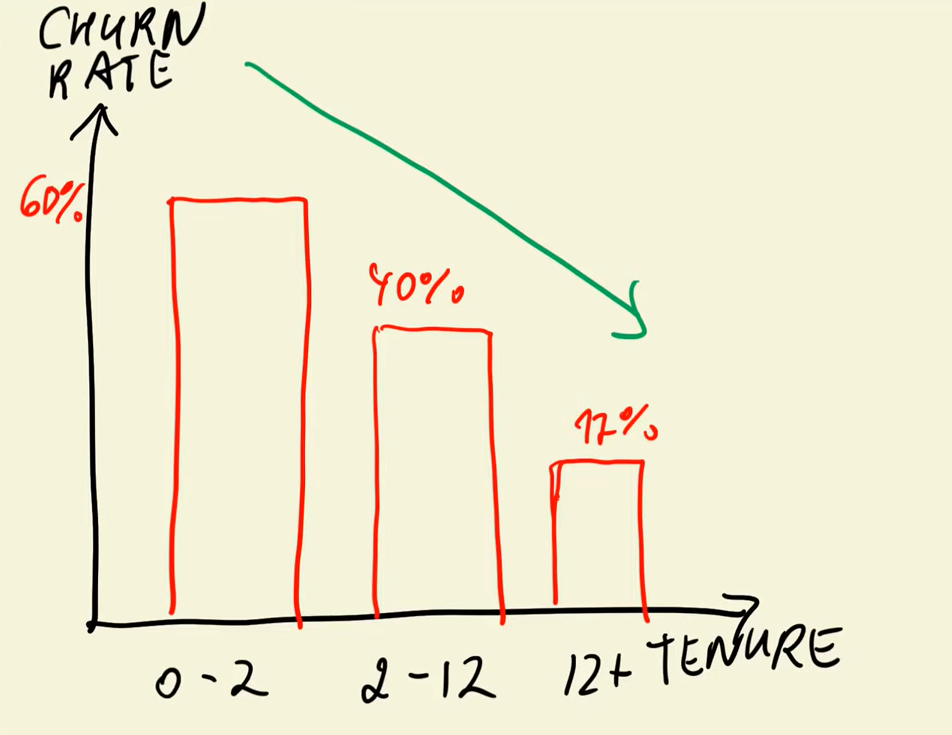

## 8.One-hot encoding

- Use Scikit-Learn to encode categorical features

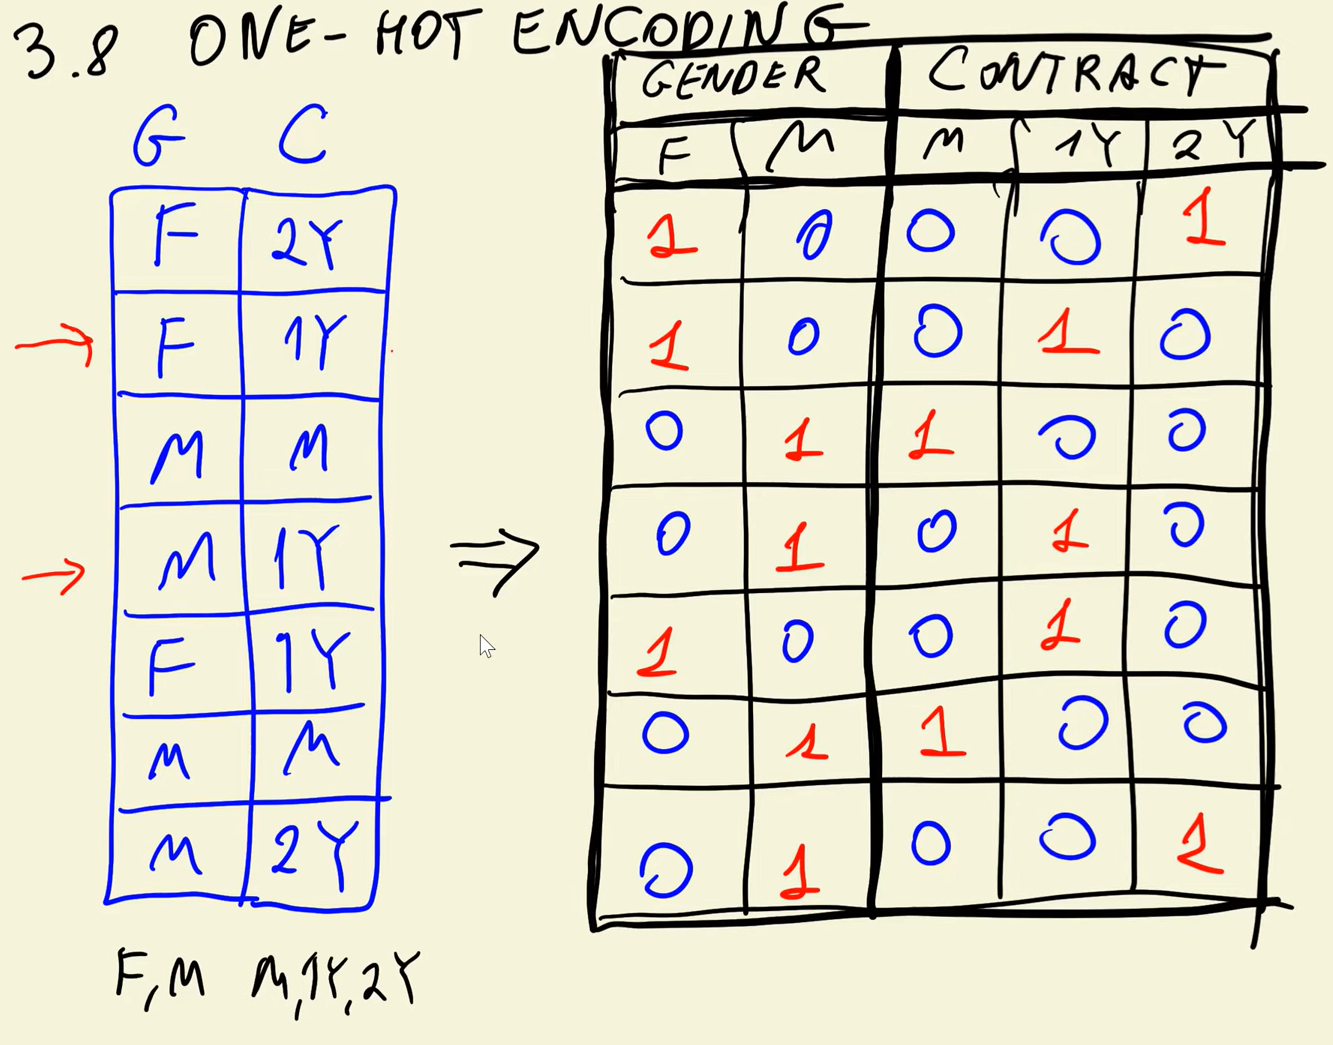

In [59]:
from sklearn.feature_extraction import DictVectorizer

In [60]:
df_train[['gender', 'contract']].iloc[:100]

gender        contract
0   female        two_year
1     male  month-to-month
2   female  month-to-month
3   female  month-to-month
4   female        two_year
..     ...             ...
95    male        one_year
96  female  month-to-month
97    male  month-to-month
98    male        one_year
99    male  month-to-month

[100 rows x 2 columns]

In [61]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

In [62]:
dv = DictVectorizer(sparse=False)

In [63]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [64]:
dv.get_feature_names()

/home/timur/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

In [65]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

Above is just example. Let's implement it to the whole dataset

In [66]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [67]:
train_dicts

[{'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 72,
  'monthlycharges': 115.5,
  'totalcharges': 8425.15},
 {'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'month-to-month',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 10,
  'monthlycharges': 95.25,
  'totalcharges': 1021.55},
 {'gender

In [68]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [69]:
dv = DictVectorizer(sparse=False)

In [70]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [71]:
dv.get_feature_names()

/home/timur/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [72]:
dv.transform(train_dicts)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

We can fit and transform simultaneously

In [73]:
X_train = dv.fit_transform(train_dicts)

In [74]:
X_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

Do the same for the validation dataset

In [75]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [76]:
X_val = dv.transform(val_dicts)

## 9.Logistic Regression

- Binary classification
- Linear vs Logistic regression

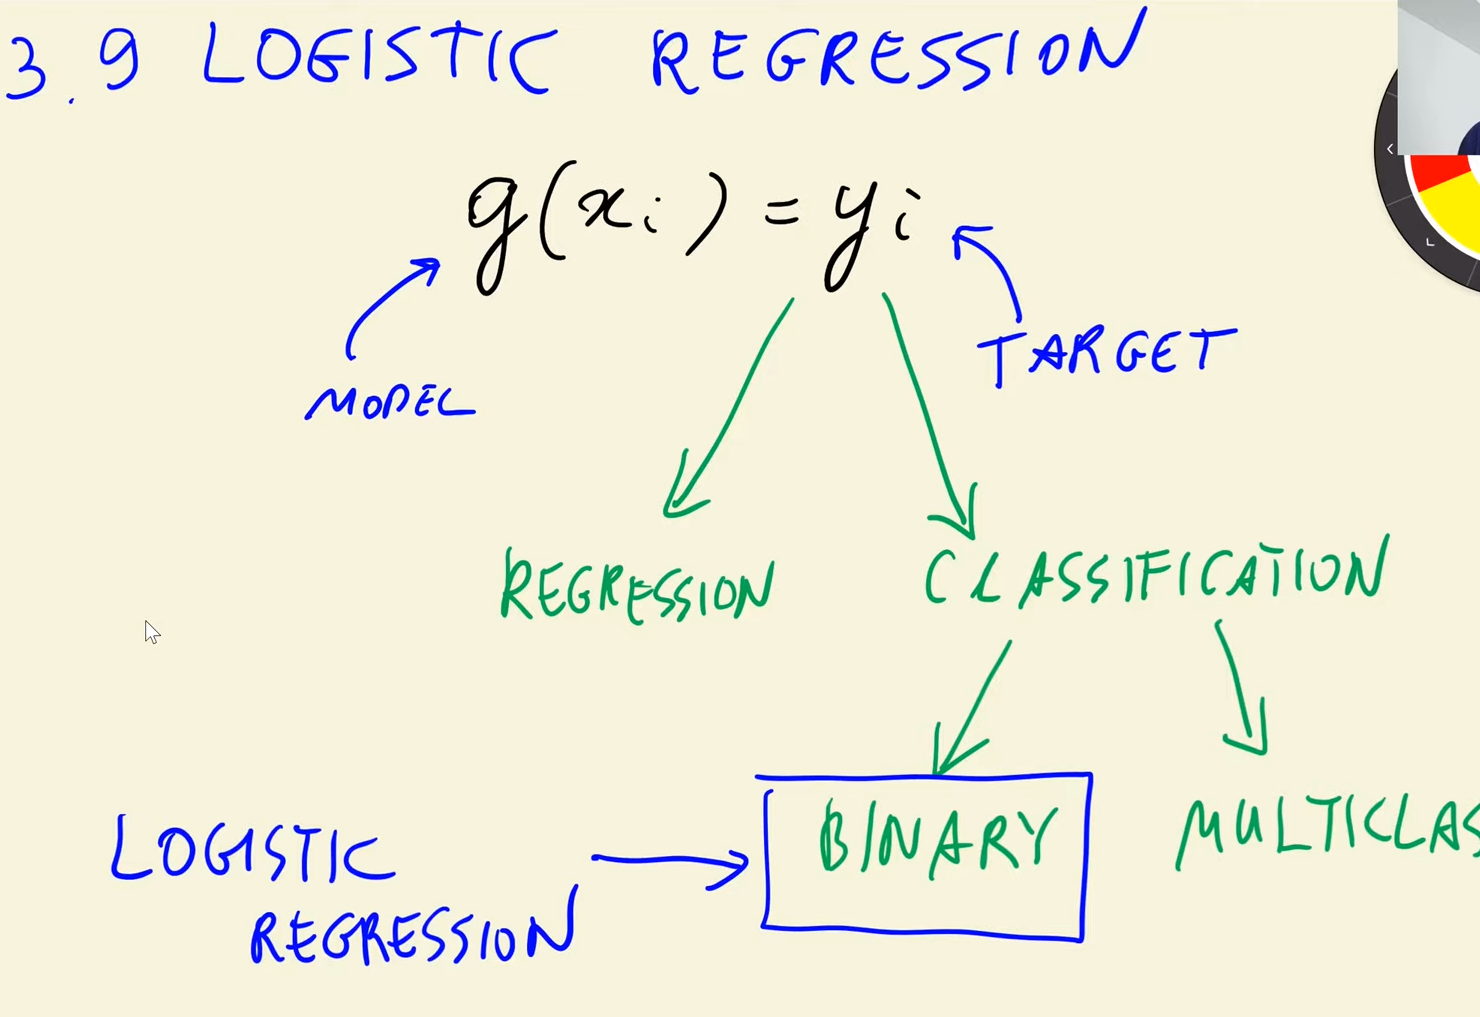

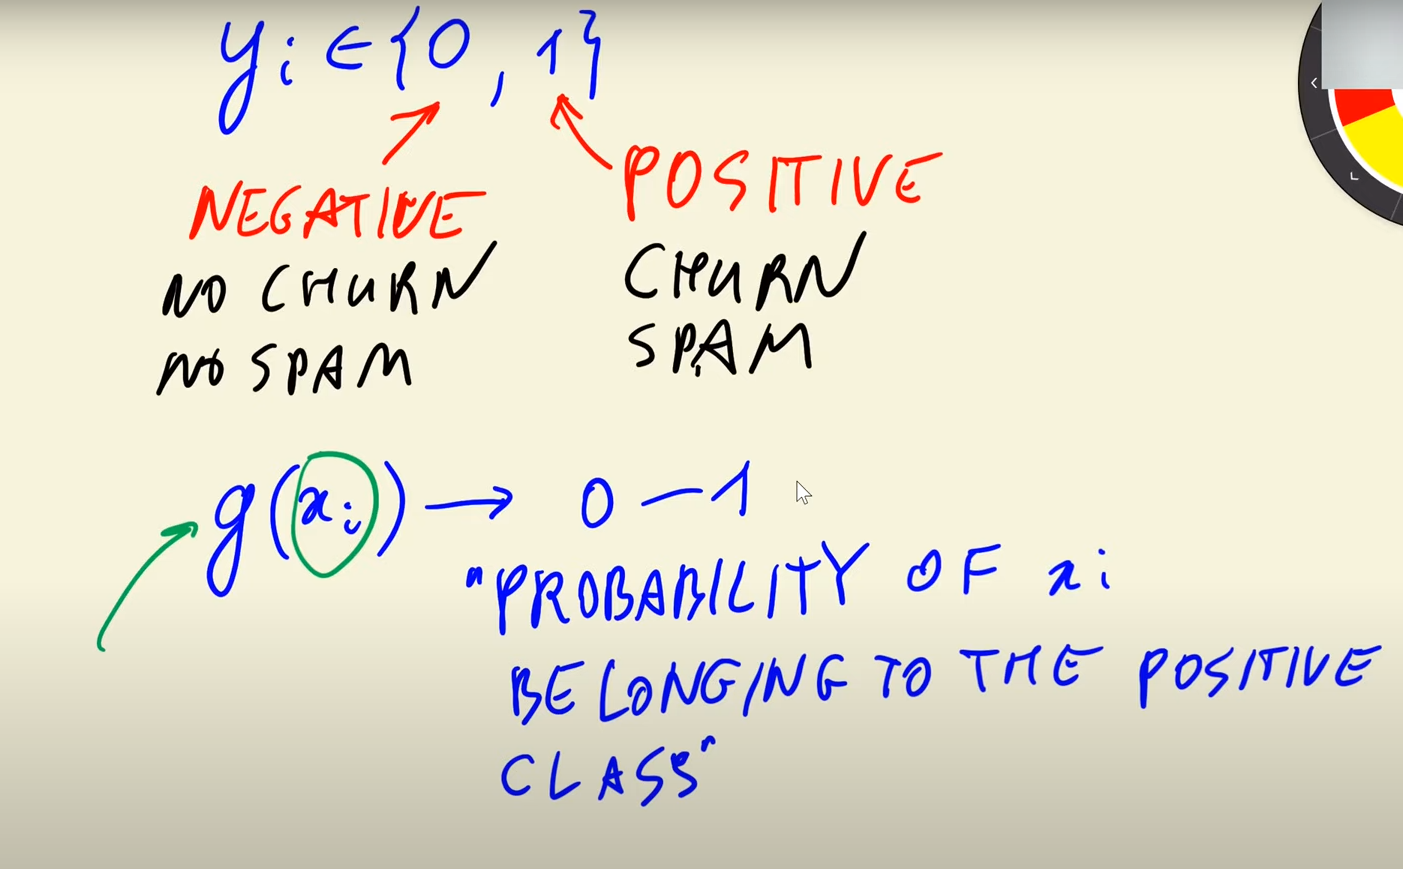

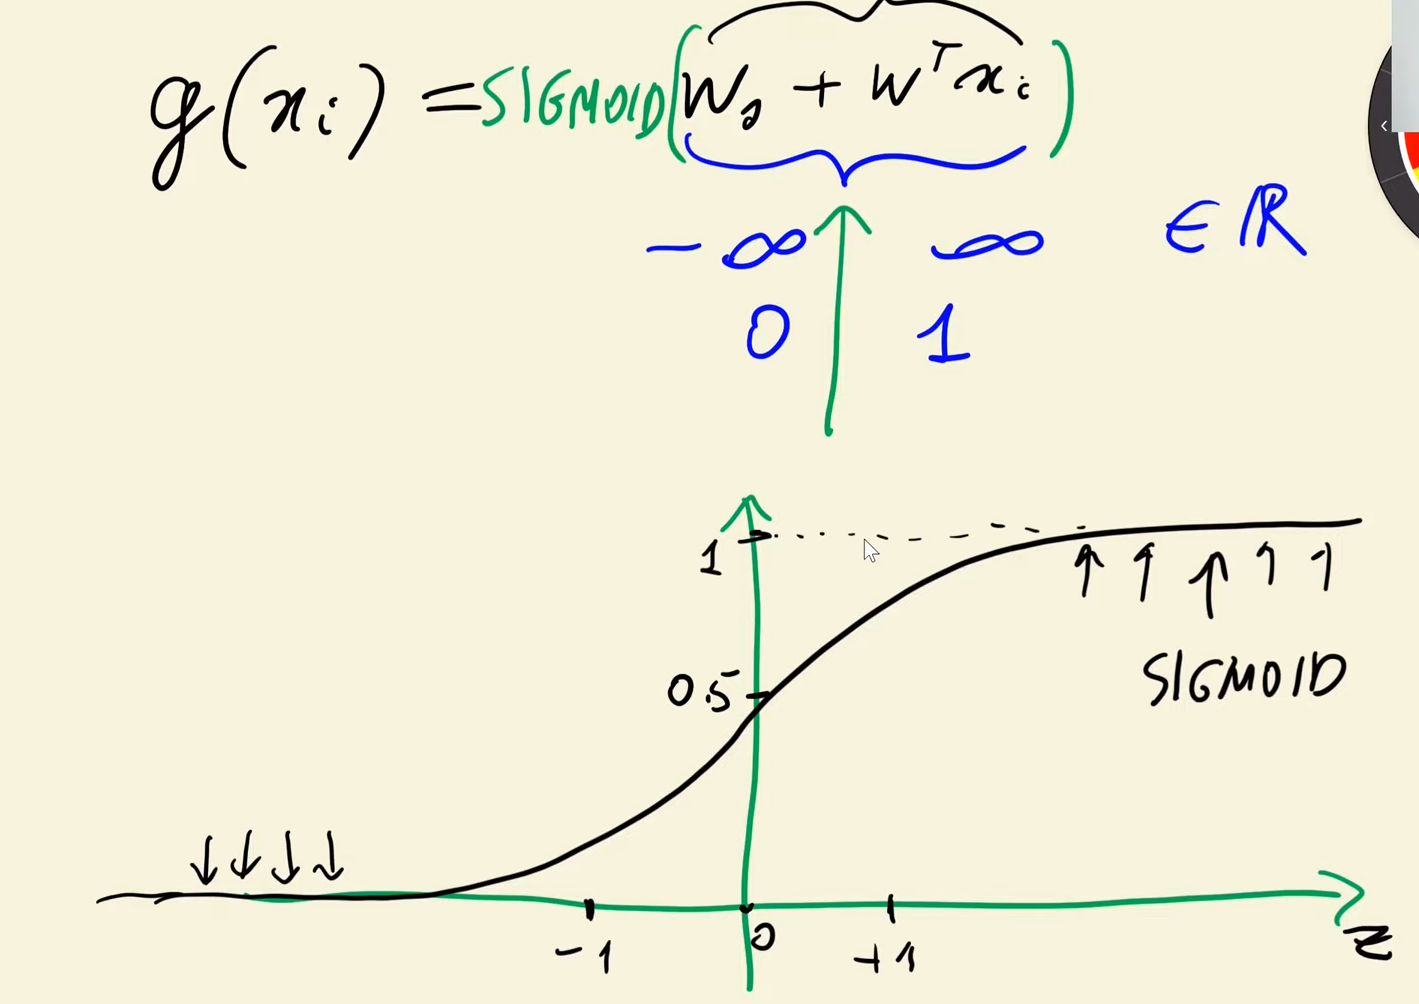

In [77]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [78]:
z = np.linspace(-5, 5, 51)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

In [79]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

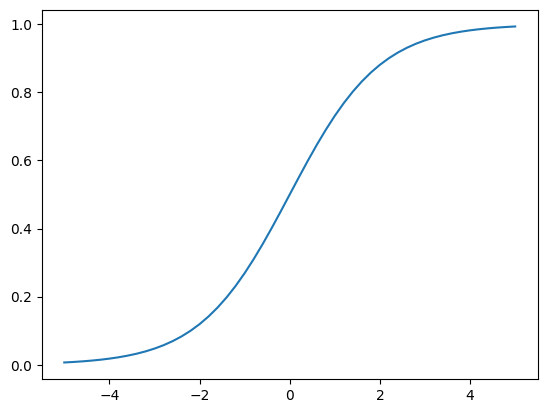

In [80]:
plt.plot(z, sigmoid(z))

In Logistic Regression by using Sigmoid we get our score and convert it into probability 

This is how Logistic Regression looks inside

In [81]:
def logistic_regression(xi):
    score = w0
    
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

## 10. Training Logistic Regression with Scikit-Learn

- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

A bias value that is added to the linear combination of input features before applying the logistic sigmoid function.

In [84]:
model.intercept_[0]

-0.10903514075824122

coefficients (weights) for each feature in the trained logistic regression model

In [85]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

This line of code uses the trained logistic regression model to make probabilistic predictions on the new data presented in X_val. The return value will be a matrix, where each row corresponds to one example from X_val, and each column represents the probability of that example belonging to different classes (in the case of binary classification, there will be two columns: one for class 0 and the other for class 1).

In [86]:
model.predict_proba(X_val)

array([[0.9910028 , 0.0089972 ],
       [0.79548134, 0.20451866],
       [0.78778252, 0.21221748],
       ...,
       [0.86360927, 0.13639073],
       [0.20023525, 0.79976475],
       [0.1625977 , 0.8374023 ]])

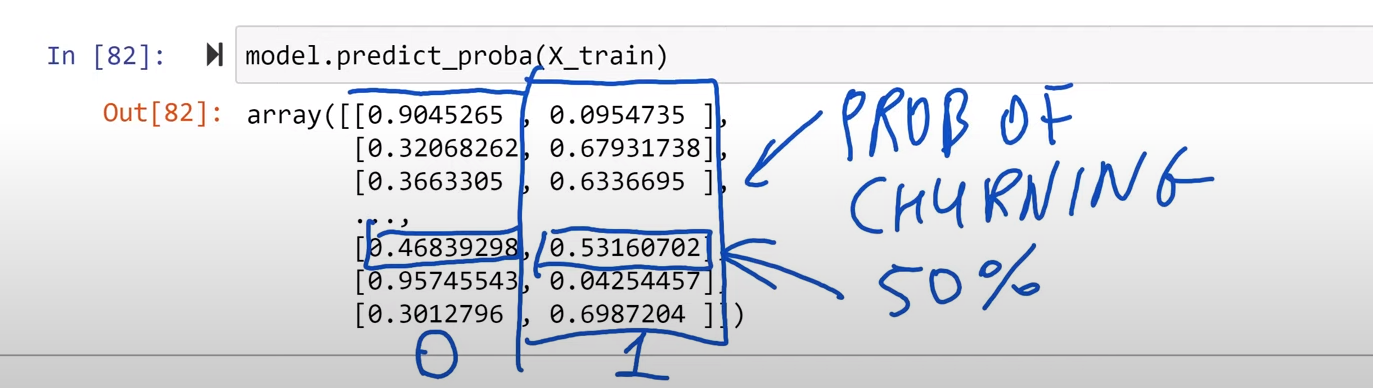

In [87]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.0089972 , 0.20451866, 0.21221748, ..., 0.13639073, 0.79976475,
       0.8374023 ])

In [88]:
churn_decision = y_pred >= 0.5
churn_decision

array([False, False, False, ..., False,  True,  True])

Customers id's which more likely will churn

In [89]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

Accuracy our model

In [90]:
(y_val == churn_decision).mean()

0.8034066713981547

## 11. Model interpretation

In [92]:
dv.get_feature_names()

/home/timur/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [93]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

We have our feature names and we have our coef so we can put it together by using zip() function

In [98]:
dict(zip(dv.feature_names_, model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In order to understand how our model works and how interpret our result let's take small group of feautres and train our model one more time

In [104]:
small = ['contract', 'tenure', 'monthlycharges']

In [105]:
df_train[small]

contract  tenure  monthlycharges
0           two_year      72          115.50
1     month-to-month      10           95.25
2     month-to-month       5           75.55
3     month-to-month       5           80.85
4           two_year      18           20.10
...              ...     ...             ...
4220        one_year      52           80.85
4221  month-to-month      18           25.15
4222  month-to-month       2           90.00
4223        two_year      27           24.50
4224  month-to-month       9           80.85

[4225 rows x 3 columns]

Convert to dict

In [107]:
df_train[small].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 99.9},
 {'contract': 'month-to-month', 'tenure': 17, 'monthlycharges': 102.55},
 {'contract': 'two_year', 'tenure': 66, 'monthlycharges': 58.2},
 {'contract': 'month-to-month', 'tenure': 2, 'monthlycharges': 68.95},
 {'contract': 'month-to-month', 't

In [108]:
dict_train_small = df_train[small].to_dict(orient='records')
dict_val_small = df_val[small].to_dict(orient='records')

DictVectorizer

In [109]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dict_train_small)

DictVectorizer(sparse=False)

Get our X feature matrix

In [112]:
X_train_small = dv_small.transform(dict_train_small)

Load and fit our model

In [113]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

Bias term

In [117]:
w0 = model_small.intercept_[0]
w0

-2.4767756632033877

Our feature's weight

In [116]:
w = model_small.coef_[0]
w

array([ 0.97004492, -0.0251365 , -0.94872201,  0.02748236, -0.03618424])

Join features names and weight

In [119]:
dict(zip(dv_small.get_feature_names(), w.round(3)))

/home/timur/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

So we get features names and their weight. This is how it looks exactly

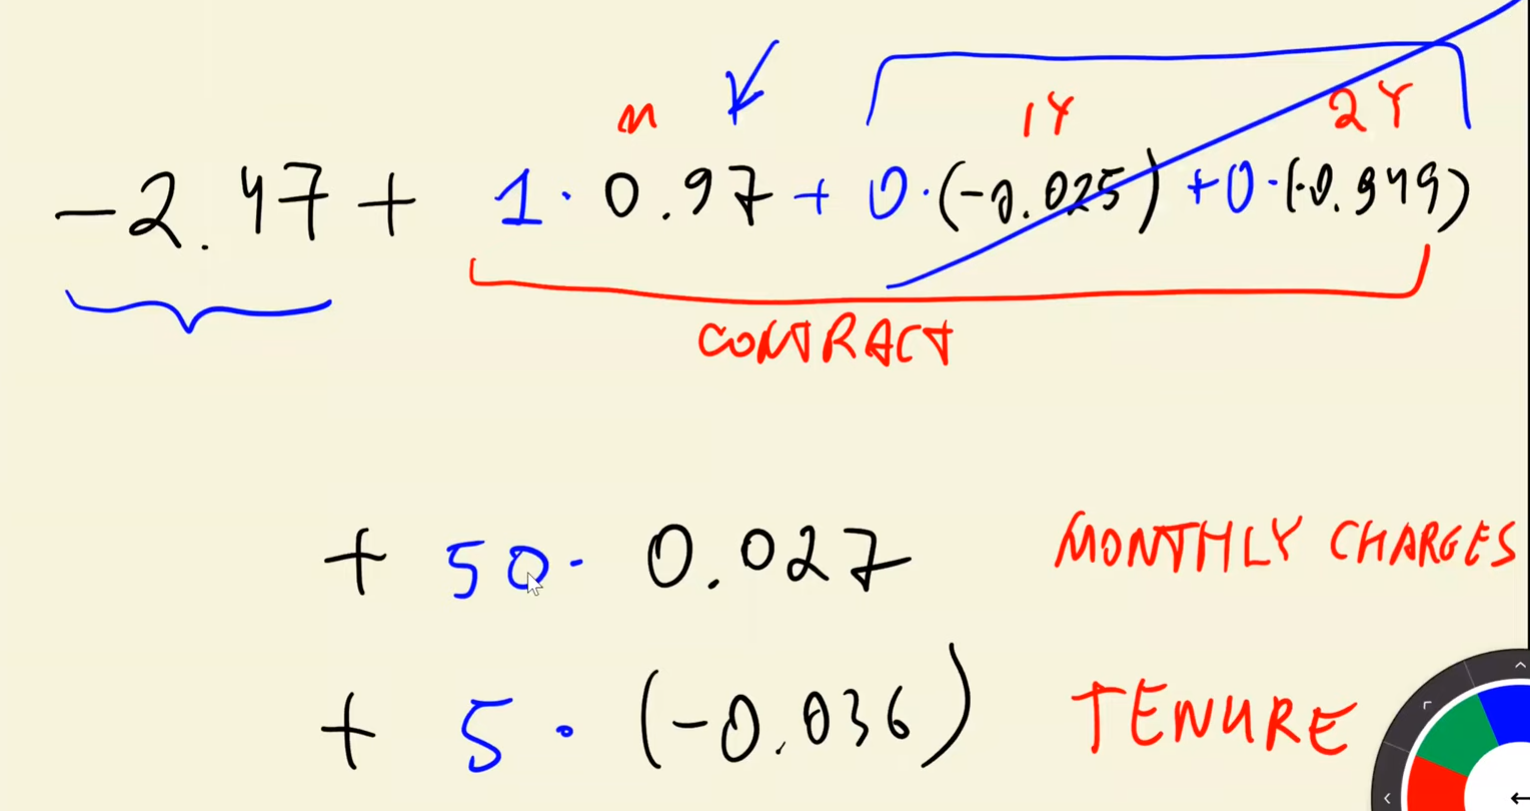

Our score

In [146]:
-2.47 + 0.97 + 50 * 0.027 +5 * (-0.036)

-0.3300000000000001

And this one our probability to churn

In [147]:
sigmoid(_)

0.41824062315816374

This is interpretation our model's work

## 12. Using the model

We're going to train our model on full_train dataset

In [152]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [154]:
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [157]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

Get y_full_train

In [159]:
y_full_train = df_full_train.churn.values
y_full_train

array([0, 1, 0, ..., 1, 1, 0])

Our final model

In [161]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

Get X_test in the same way how we did it previously

In [162]:
dict_test = df_test[categorical + numerical].to_dict(orient='records')

In [163]:
X_test = dv.transform(dict_test)

Apply our model and predict proba

In [165]:
y_pred = model.predict_proba(X_test)[:,1]
y_pred

array([0.06224296, 0.17473875, 0.37026701, ..., 0.00638005, 0.16576097,
       0.59688521])

We create a bar above which it will be considered that the client will leave us

In [166]:
churn_decision = (y_pred >= 0.5)

Accuracy our model

In [168]:
(churn_decision == y_test).mean()

0.815471965933286

Let's test our model on particular customer

In [170]:
customer = dict_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [171]:
X_small = dv.transform([customer])

Predict probability to churn

In [173]:
model.predict_proba(X_small)[0, 1]

0.4056810977769737

So we get only 40% probability that our customer is going to churn

Check it out

In [174]:
y_test[10]

0

### It looks like our model works correct